# **Práctica parte FastAP**

In [1]:
!pip install pandas numpy mlflow scikit-learn pyngrok fastapi uvicorn
!pip install fastapi uvicorn pyngrok nest_asyncio




In [2]:
# Carga de librerías
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.datasets import load_breast_cancer
from pyngrok import ngrok
import subprocess
import time

import uvicorn
from threading import Thread
import nest_asyncio

print('Librerías listas...')


Librerías listas...


In [4]:
ngrok.kill()  # Detener ngrok
!ngrok config add-authtoken 2q8J2TuNkPPszG3UVbFRqnBIBqE_6S7JTdtvZCykGko6LS24g

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [5]:
#pruebas de coneccoin fastapi  en gogole colab
nest_asyncio.apply()  # Permitir bucles de eventos anidados en Colab

def start_server():
    """
    Función para iniciar el servidor FastAPI con Uvicorn.
    """
    uvicorn.run(app, host="0.0.0.0", port=8000)

# Iniciar el servidor FastAPI en un hilo aparte
server_thread = Thread(target=start_server)
server_thread.start()

# Exponer el servidor FastAPI con ngrok
public_url = ngrok.connect(8000, "http")
print(f"Tu API pública está disponible en: {public_url}")

Exception in thread Thread-11 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-7298c31cb365>", line 8, in start_server
NameError: name 'app' is not defined


Tu API pública está disponible en: NgrokTunnel: "https://acae-34-70-56-1.ngrok-free.app" -> "http://localhost:8000"


In [6]:
from fastapi import FastAPI
from transformers import pipeline
import nest_asyncio
import uvicorn
from pyngrok import ngrok
from threading import Thread

# Inicializar FastAPI
app = FastAPI()

# 1. Módulo 1: Respuesta de saludo
@app.get("/")
def root():
    return {"message": "¡Bienvenido a mi API de práctica!"}

# 2. Módulo 2: Información general
@app.get("/info")
def info():
    return {
        "author": "Tu Nombre",
        "description": "API de práctica con FastAPI y Hugging Face",
        "version": "1.0.0"
    }

# 3. Módulo 3: Sentiment Analysis (HF Pipeline)
@app.get("/sentiment-analysis")
def sentiment_analysis(text: str):
    model = pipeline("sentiment-analysis")
    result = model(text)
    return {"input_text": text, "analysis": result}

# 4. Módulo 4: Resumen de texto (HF Pipeline)
@app.get("/text-summary")
def text_summary(text: str):
    model = pipeline("summarization")
    summary = model(text, max_length=50, min_length=10, do_sample=False)
    return {"input_text": text, "summary": summary}

# 5. Módulo 5: Multiplicación de dos números
@app.get("/multiply")
def multiply(a: int, b: int):
    result = a * b
    return {"a": a, "b": b, "result": result}

# Configuración para iniciar el servidor FastAPI
def start_server():
    uvicorn.run(app, host="0.0.0.0", port=8000)

# Usar ngrok para exponer la API públicamente
ngrok.set_auth_token("<YOUR_AUTH_TOKEN>")  # Reemplaza con tu token de ngrok
public_url = ngrok.connect(8000, "http")
print(f"Tu API pública está disponible en: {public_url}")

# Iniciar FastAPI
nest_asyncio.apply()  # Permitir bucles de eventos en Colab
server_thread = Thread(target=start_server)
server_thread.start()


Tu API pública está disponible en: NgrokTunnel: "https://7717-34-70-56-1.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [8210]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


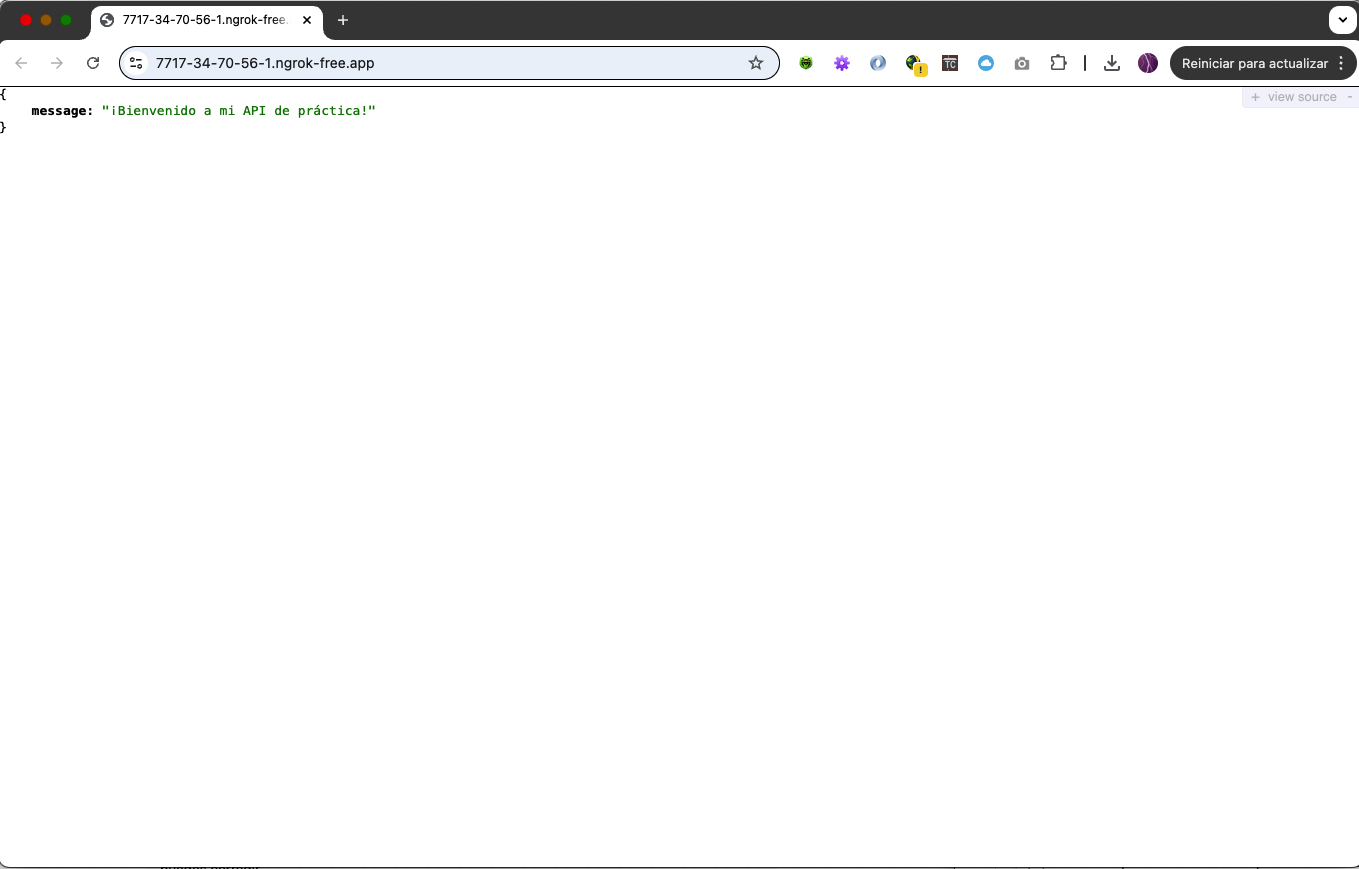


**Para validar los endpoints usamos  CocoaRestClient**

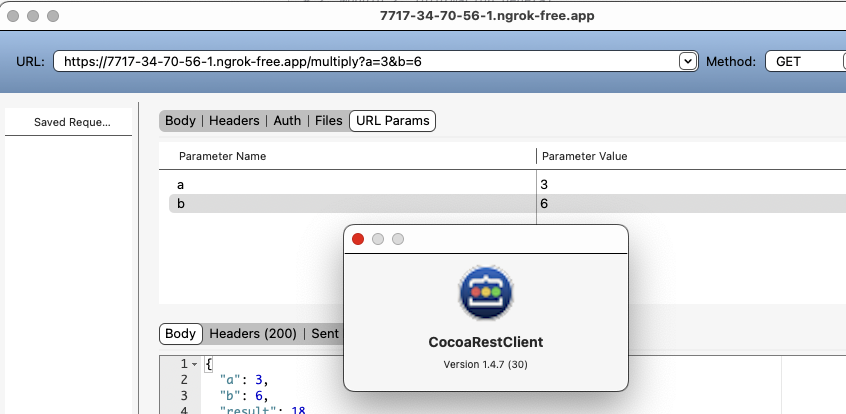



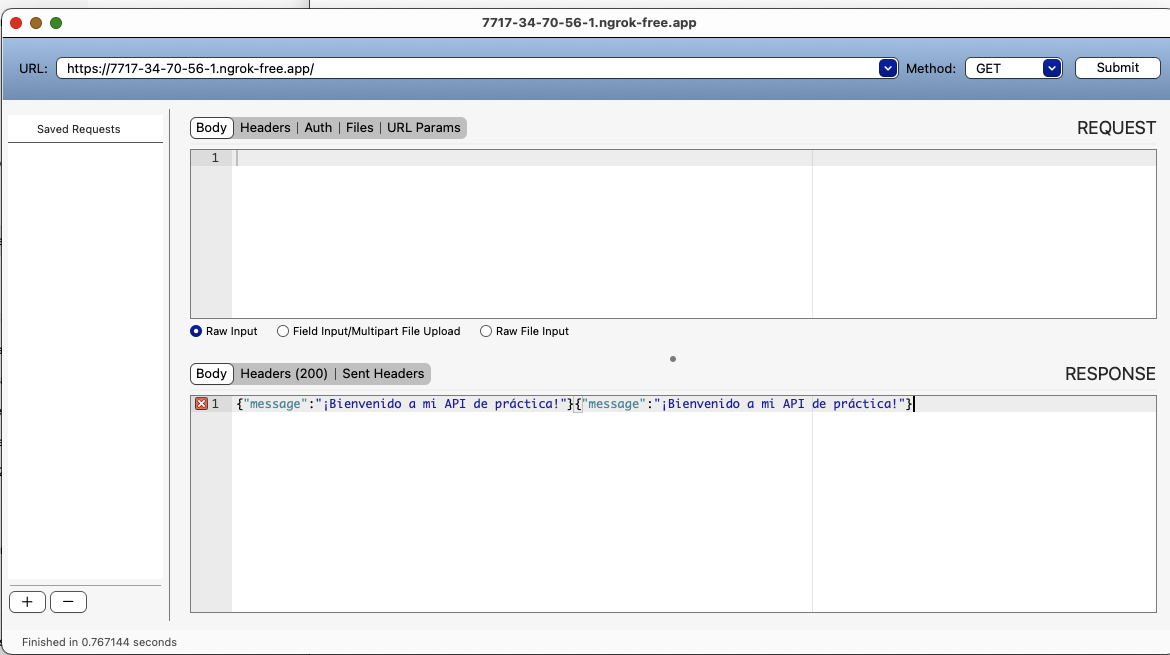

# https://7717-34-70-56-1.ngrok-free.app/info



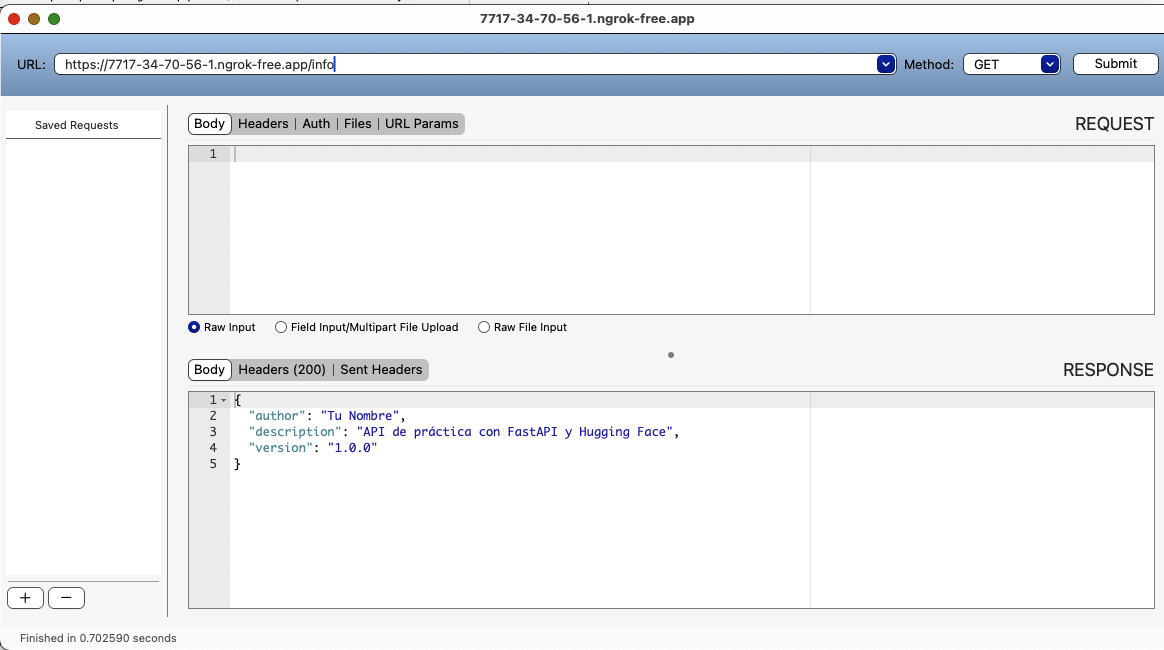

# https://7717-34-70-56-1.ngrok-free.app/sentiment-analysis/text=


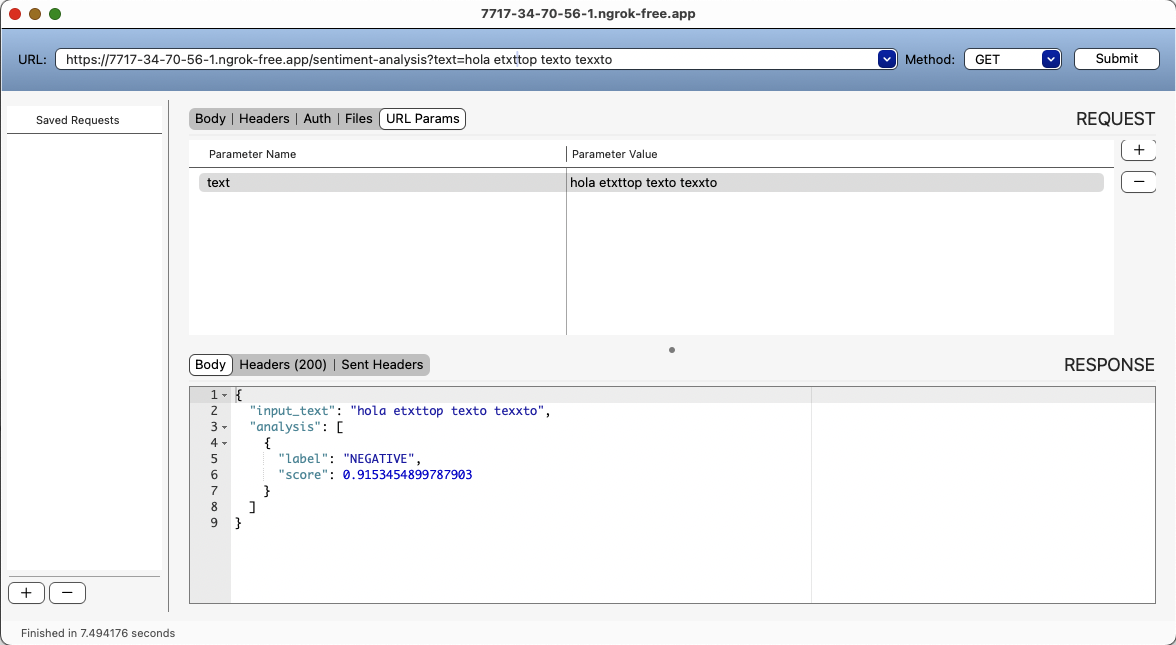

# https://7717-34-70-56-1.ngrok-free.app/text-summary/text=

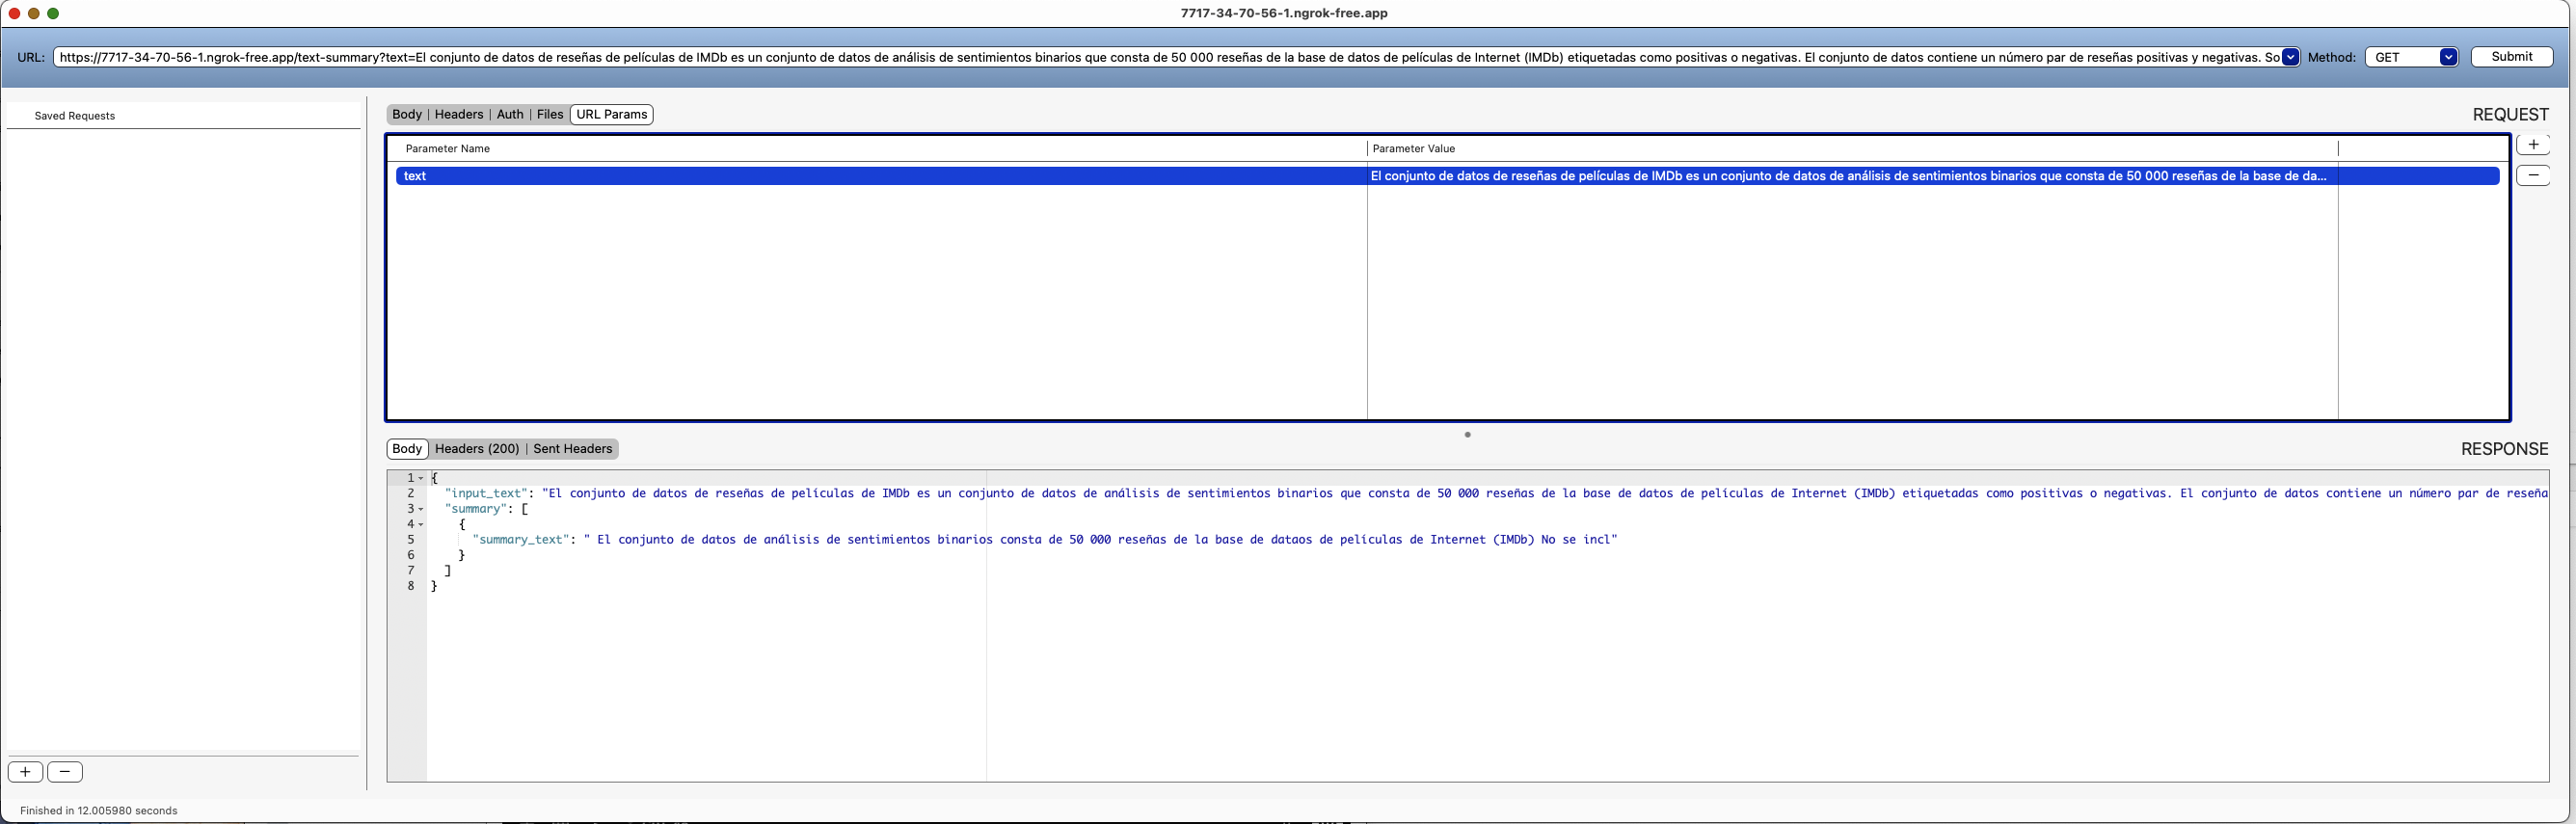

https://7717-34-70-56-1.ngrok-free.app/multiply/a= &b=

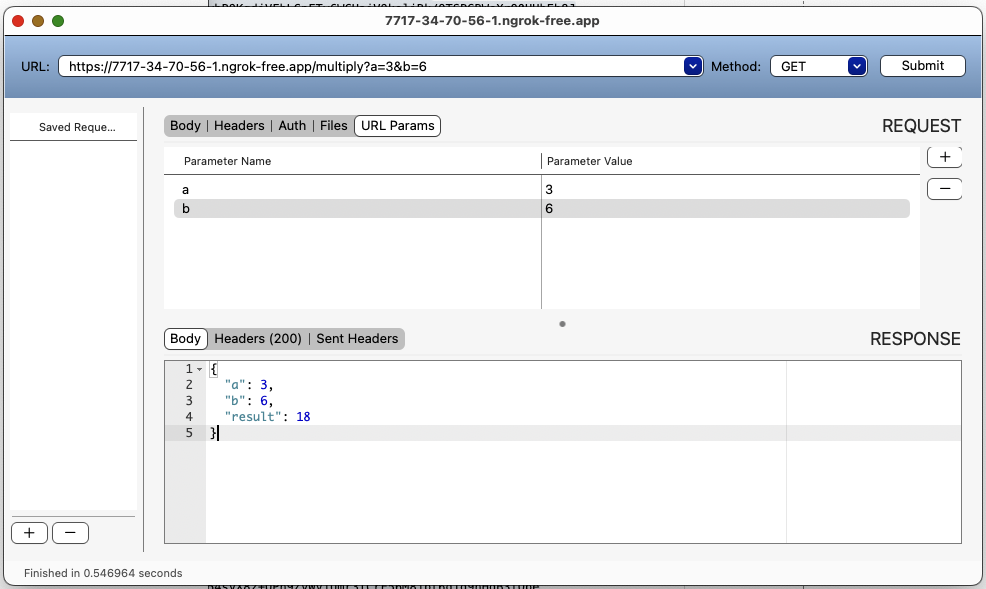